<a href="https://colab.research.google.com/github/a-winders/MLA_ATW/blob/main/FinalProject_Regression_ATW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FinalProject_Regression 
# Adam Winders
# CS-430-ON
# Machine Learning in the Cloud
<br>

## Standard Imports

In [623]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [624]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models


In [625]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

## Imports for Splitting Data and Building Pipeline


In [626]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [627]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [628]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [629]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

# Problem 1

### Acquire Data

Imports the dataframe

In [630]:
df = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430_Data_Files/Life Expectancy Data.csv')

### Statistical and Visual Exploration

Displays the first five rows

In [631]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Displays the last five rows

In [632]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


Displays five random rows

In [633]:
df.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1486,Lesotho,2003,Developing,45.5,648.0,5,1.99,5.300902,17.0,1,26.4,7,9.0,7.13,9.0,33.8,63.636279,191897.0,1.2,1.1,0.440,10.5
1343,Jordan,2002,Developing,72.1,129.0,4,0.54,259.157238,95.0,19,55.5,4,95.0,9.68,95.0,0.1,1812.288374,5287488.0,3.9,3.9,0.712,13.0
851,Eritrea,2014,Developing,64.4,261.0,5,0.01,0.000000,94.0,127,18.0,8,94.0,3.34,94.0,0.4,NaN,NaN,8.5,8.3,0.416,5.0
379,Brunei Darussalam,2004,Developing,76.4,89.0,0,0.11,1504.300040,99.0,16,3.1,0,92.0,3.10,92.0,0.1,21896.652700,NaN,6.5,6.0,0.828,13.7
1960,Panama,2014,Developing,77.6,119.0,1,6.74,1842.463782,8.0,0,57.1,1,8.0,8.30,8.0,0.1,12593.737400,393986.0,1.9,1.8,0.780,13.0


Displays all columns

In [634]:
pd.set_option('display.max_columns', None)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Displays number of rows in each column with NaN values

In [635]:
a=list(df.columns)
b=[]
for i in a:
    c=df[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,10
4,Adult Mortality,10
5,infant deaths,0
6,Alcohol,194
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


In [636]:
df['Life expectancy ']=df['Life expectancy '].fillna(value=df['Life expectancy '].mean())
df['Adult Mortality']=df['Adult Mortality'].fillna(value=df['Adult Mortality'].mean())

Displays correlation matrix

In [637]:
corr_data=df.corr()
corr_data

<ipython-input-637-f220a2a47b9b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data=df.corr()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.404029,0.381791,0.255760,-0.157574,0.564466,-0.222503,0.464531,0.216373,0.478465,-0.556457,0.461393,-0.021548,-0.476561,-0.470977,0.724631,0.748263
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.195454,-0.242814,-0.161828,0.031174,-0.384806,0.094135,-0.274218,-0.114355,-0.274540,0.523727,-0.296019,-0.013639,0.302501,0.308053,-0.457530,-0.452380
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404029,-0.195454,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.255760,-0.161828,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.564466,-0.384806,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


Fills all NaN values in each column

In [638]:
# credit: https://www.kaggle.com/code/najeedosmani/96-r2-score-using-linear-regression

# Polio
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=45:
            return 80.0
        elif 45<l<=50:
            return 67.0
        elif 50<l<=60:
            return 87.44
        elif 60<l<=70:
            return 91
        elif 70<l<=80:
            return 94.3
        elif l>80:
            return 95
    else:
        return p
    
df['Polio']=df[['Polio','Life expectancy ']].apply(impute_polio,axis=1)

# Diptheria
def impute_Diptheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=10:
            return 75.0
        elif 10<p<=40:
            return 37.0
        elif 40<p<=45:
            return 40.0
        elif 45<p<=50:
            return 50.0
        elif 50<p<=60:
            return 55.0
        elif 60<p<=80:
            return 65.0
        elif p>80:
            return 90.0
    else:
        return d
df['Diphtheria ']=df[['Diphtheria ','Polio']].apply(impute_Diptheria,axis=1)

# Hepatitis B
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=15:
            return 75.0
        elif 15<dip<=30:
            return 20.0
        elif 30<dip<=45:
            return 38.0
        elif 45<dip<=60:
            return 43.0
        elif 60<dip<=80:
            return 63.0
        elif dip>80:
            return 88.4
    else:
        return hep
    
df['Hepatitis B']=df[['Hepatitis B','Diphtheria ']].apply(impute_HepatatisB,axis=1)

#BMI
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b
    
df[' BMI ']=df[[' BMI ','Life expectancy ']].apply(impute_BMI,axis=1)

# Total expenditure
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t
    
df['Total expenditure']=df[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1)

# GDP
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 1100.0
        elif 1250<p<=2500:
            return 1800.0
        elif 2500<p<=3750:
            return 2900.0
        elif 3750<p<=7500:
            return 3500.0
        elif 7500<p<=8750:
            return 4500.0
        elif 8750<p<=10000:
            return 5000.0
        elif 10000<p<=11250:
            return 5700.0
        elif 11250<p<=12500:
            return 7000.0
        elif 12500<p<=15000:
            return 8000.0
        elif 15000<p<=17500:
            return 9000.0
        elif p>17500:
            return 8500.0
    else:
        return g
    
df['GDP']=df[['GDP','percentage expenditure']].apply(impute_GDP,axis=1)

# Population
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 0.19*((10)**9)
        elif 100<i<=250:
            return 0.18*((10)**9)
        elif 250<i<=350:
            return 0.02*((10)**9)
        elif 350<i<=900:
            return 0.1*((10)**9)
        elif 900<i<=1100:
            return 0.18*((10)**9)
        elif 1100<i<=1250:
            return 0.05*((10)**9)
        elif 1250<i<=1500:
            return 0.19*((10)**9)
        elif 1500<i<=1750:
            return 0.05*((10)**9)
        elif i>1750:
            return 0.1*((10)**9)
    else:
        return p
    
df['Population']=df[['Population','infant deaths']].apply(impute_population,axis=1)

# Thinness 1-19 years
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
df[' thinness  1-19 years']=df[[' thinness  1-19 years',' BMI ']].apply(impute_Thin_1,axis=1)

# Thinness 5-9 years
def impute_Thin_5(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
df[' thinness 5-9 years']=df[[' thinness 5-9 years',' BMI ']].apply(impute_Thin_1,axis=1)

# Income composition of resources
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
df['Income composition of resources']=df[['Income composition of resources','Life expectancy ']].apply(impute_Income,axis=1)

# Schooling
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s
    
df['Schooling']=df[['Schooling','Life expectancy ']].apply(impute_schooling,axis=1)

In [639]:
a=list(df.columns)
b=[]
for i in a:
    c=df[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,194
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


In [640]:
def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return 4.0
        elif 2.5<sc<=5.0:
            return 1.5
        elif 5.0<sc<=7.5:
            return 2.5
        elif 7.5<sc<=10.0:
            return 3.0
        elif 10.0<sc<=15:
            return 4.0
        elif sc>15:
            return 10.0
    else:
        return al
    
df['Alcohol']=df[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

In [641]:
a=list(df.columns)
b=[]
for i in a:
    c=df[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


In [642]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t
    
df['Total expenditure']=df[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1) 

Displays number of NaN values after fill

In [643]:
a=list(df.columns)
b=[]
for i in a:
    c=df[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


Returns standard stats for each column (count, mean, etc.)

In [644]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.626872,738.251295,79.373928,2419.592240,38.198060,42.035739,82.581906,5.944391,82.356705,1.742103,6509.824571,5.201981e+07,4.867427,4.897686,0.624758,11.947992
std,4.613841,9.507640,124.080302,117.926501,3.973232,1987.914858,24.488486,11467.272489,19.963537,160.445548,23.363600,2.403566,23.651584,5.077785,13335.774581,9.112931e+07,4.403242,4.491058,0.208649,3.335364
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,74.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.488250,10.000000
50%,2008.000000,72.000000,144.000000,3.000000,4.000000,64.912906,88.400000,17.000000,43.000000,4.000000,93.000000,5.905000,93.000000,0.100000,1171.983435,3.675929e+06,3.400000,3.400000,0.675500,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.637500,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,6.610275e+07,7.200000,7.300000,0.774750,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Displays data types of all columns

In [645]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

Displays data type in **year** column

In [646]:
df.Year

0       2015
1       2014
2       2013
3       2012
4       2011
        ... 
2933    2004
2934    2003
2935    2002
2936    2001
2937    2000
Name: Year, Length: 2938, dtype: int64

Changes **status** column to 0 for *Developing* and 1 for *Developed*

In [647]:
status_encoded = df.drop(columns='Country', axis=1, inplace=False)
status_encoded['Status'].replace(['Developing', 'Developed'], [0, 1], inplace=True)

Display changed values from **status** column

In [648]:
status_encoded

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [649]:
df.Status

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2938, dtype: object

In [650]:
status_total = ['2938']
status_type = df['Status'].groupby(df['Status']).count()

In [651]:
from sklearn.preprocessing import OrdinalEncoder

In [652]:
ordinal_encoder = OrdinalEncoder()
status_cat = df[['Status']]
status_encoded = ordinal_encoder.fit_transform(status_cat)

In [653]:
status_encoded[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [654]:
from sklearn.preprocessing import OneHotEncoder

In [655]:
onehot_encoder = OneHotEncoder()
status_encoded = onehot_encoder.fit_transform(status_cat)

In [656]:
onehot_encoder.categories_

[array(['Developed', 'Developing'], dtype=object)]

Scatter plot

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

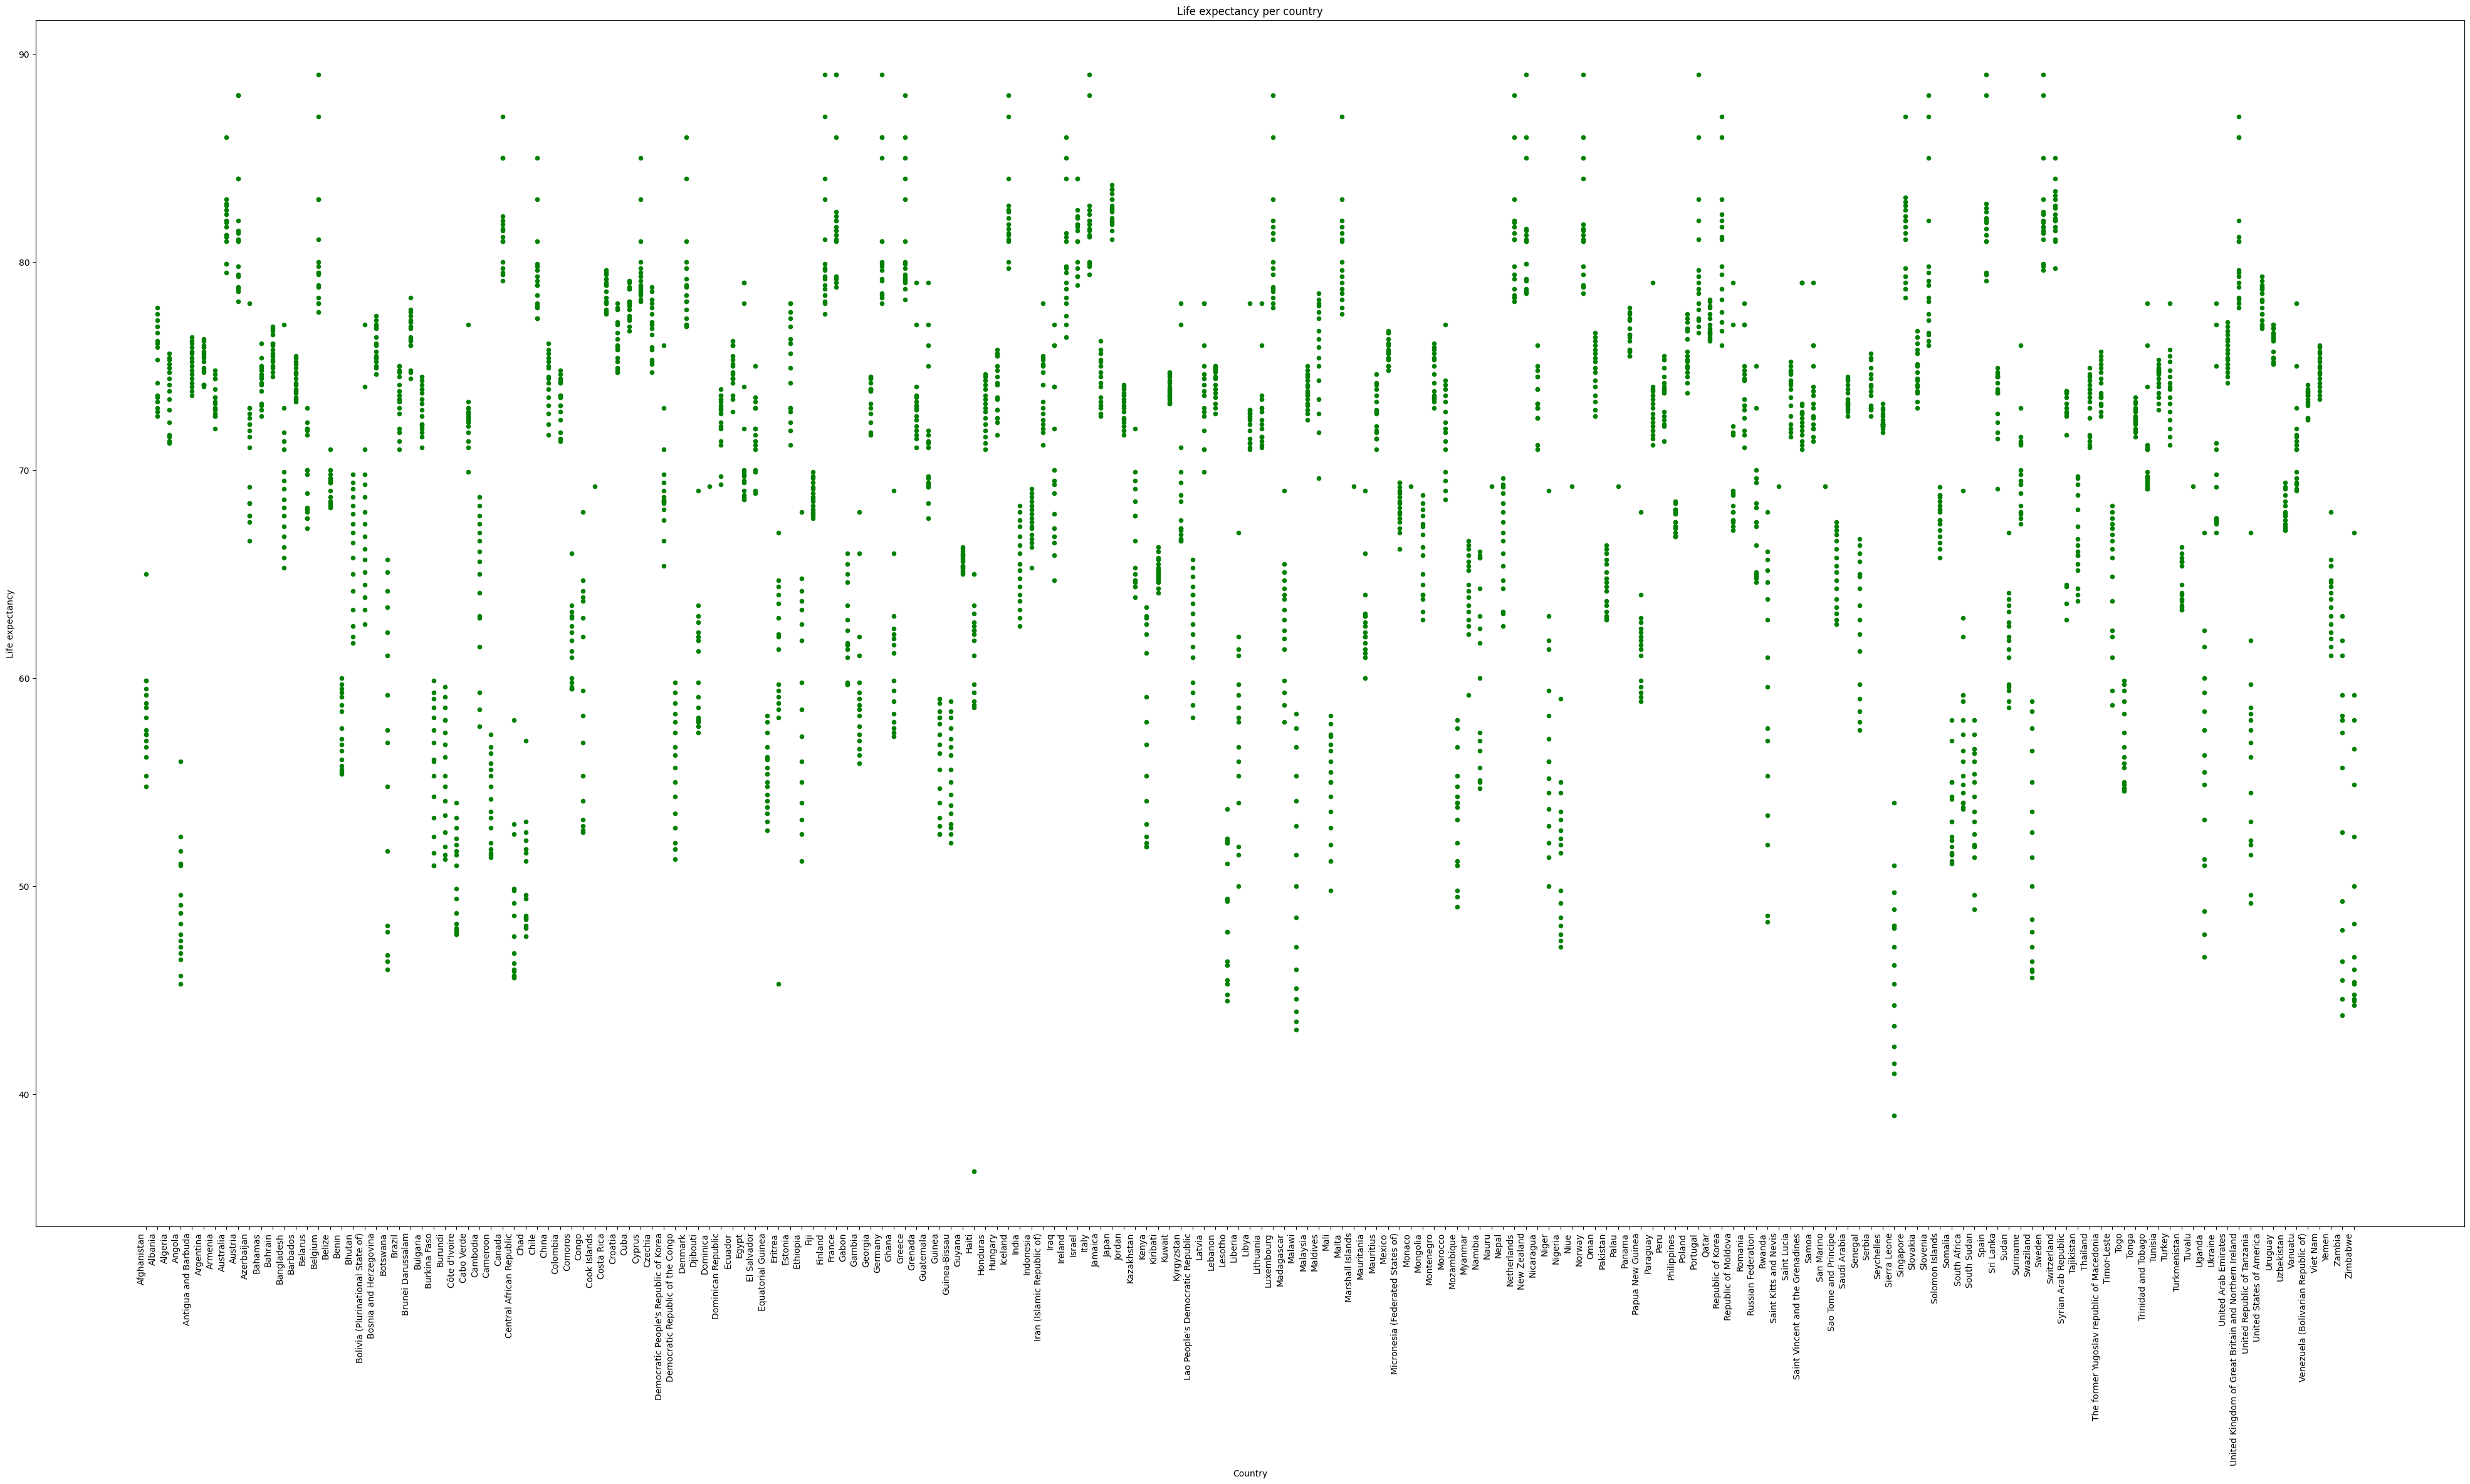

In [657]:
df.plot(kind='scatter',x='Country',xlabel='Country',y='Life expectancy ',ylabel='Life expectancy',c = 'green',title="Life expectancy per country",figsize=(50,25))
plt.xticks(rotation='vertical', ha='right')

Pairplot

In [658]:
plotDF = df[['infant deaths','Measles ','under-five deaths ']]

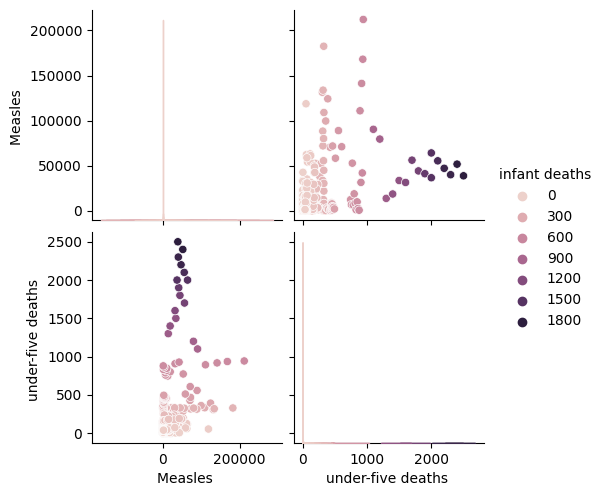

In [659]:
sns.pairplot(data=plotDF, diag_kind='kde', hue='infant deaths')

Line plot

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, ''),
  Text(0.0, 0, 'Developed'),
  Text(0.2, 0, ''),
  Text(0.4000000000000001, 0, ''),
  Text(0.6000000000000001, 0, ''),
  Text(0.8, 0, ''),
  Text(1.0000000000000002, 0, ''),
  Text(1.2000000000000002, 0, '')])

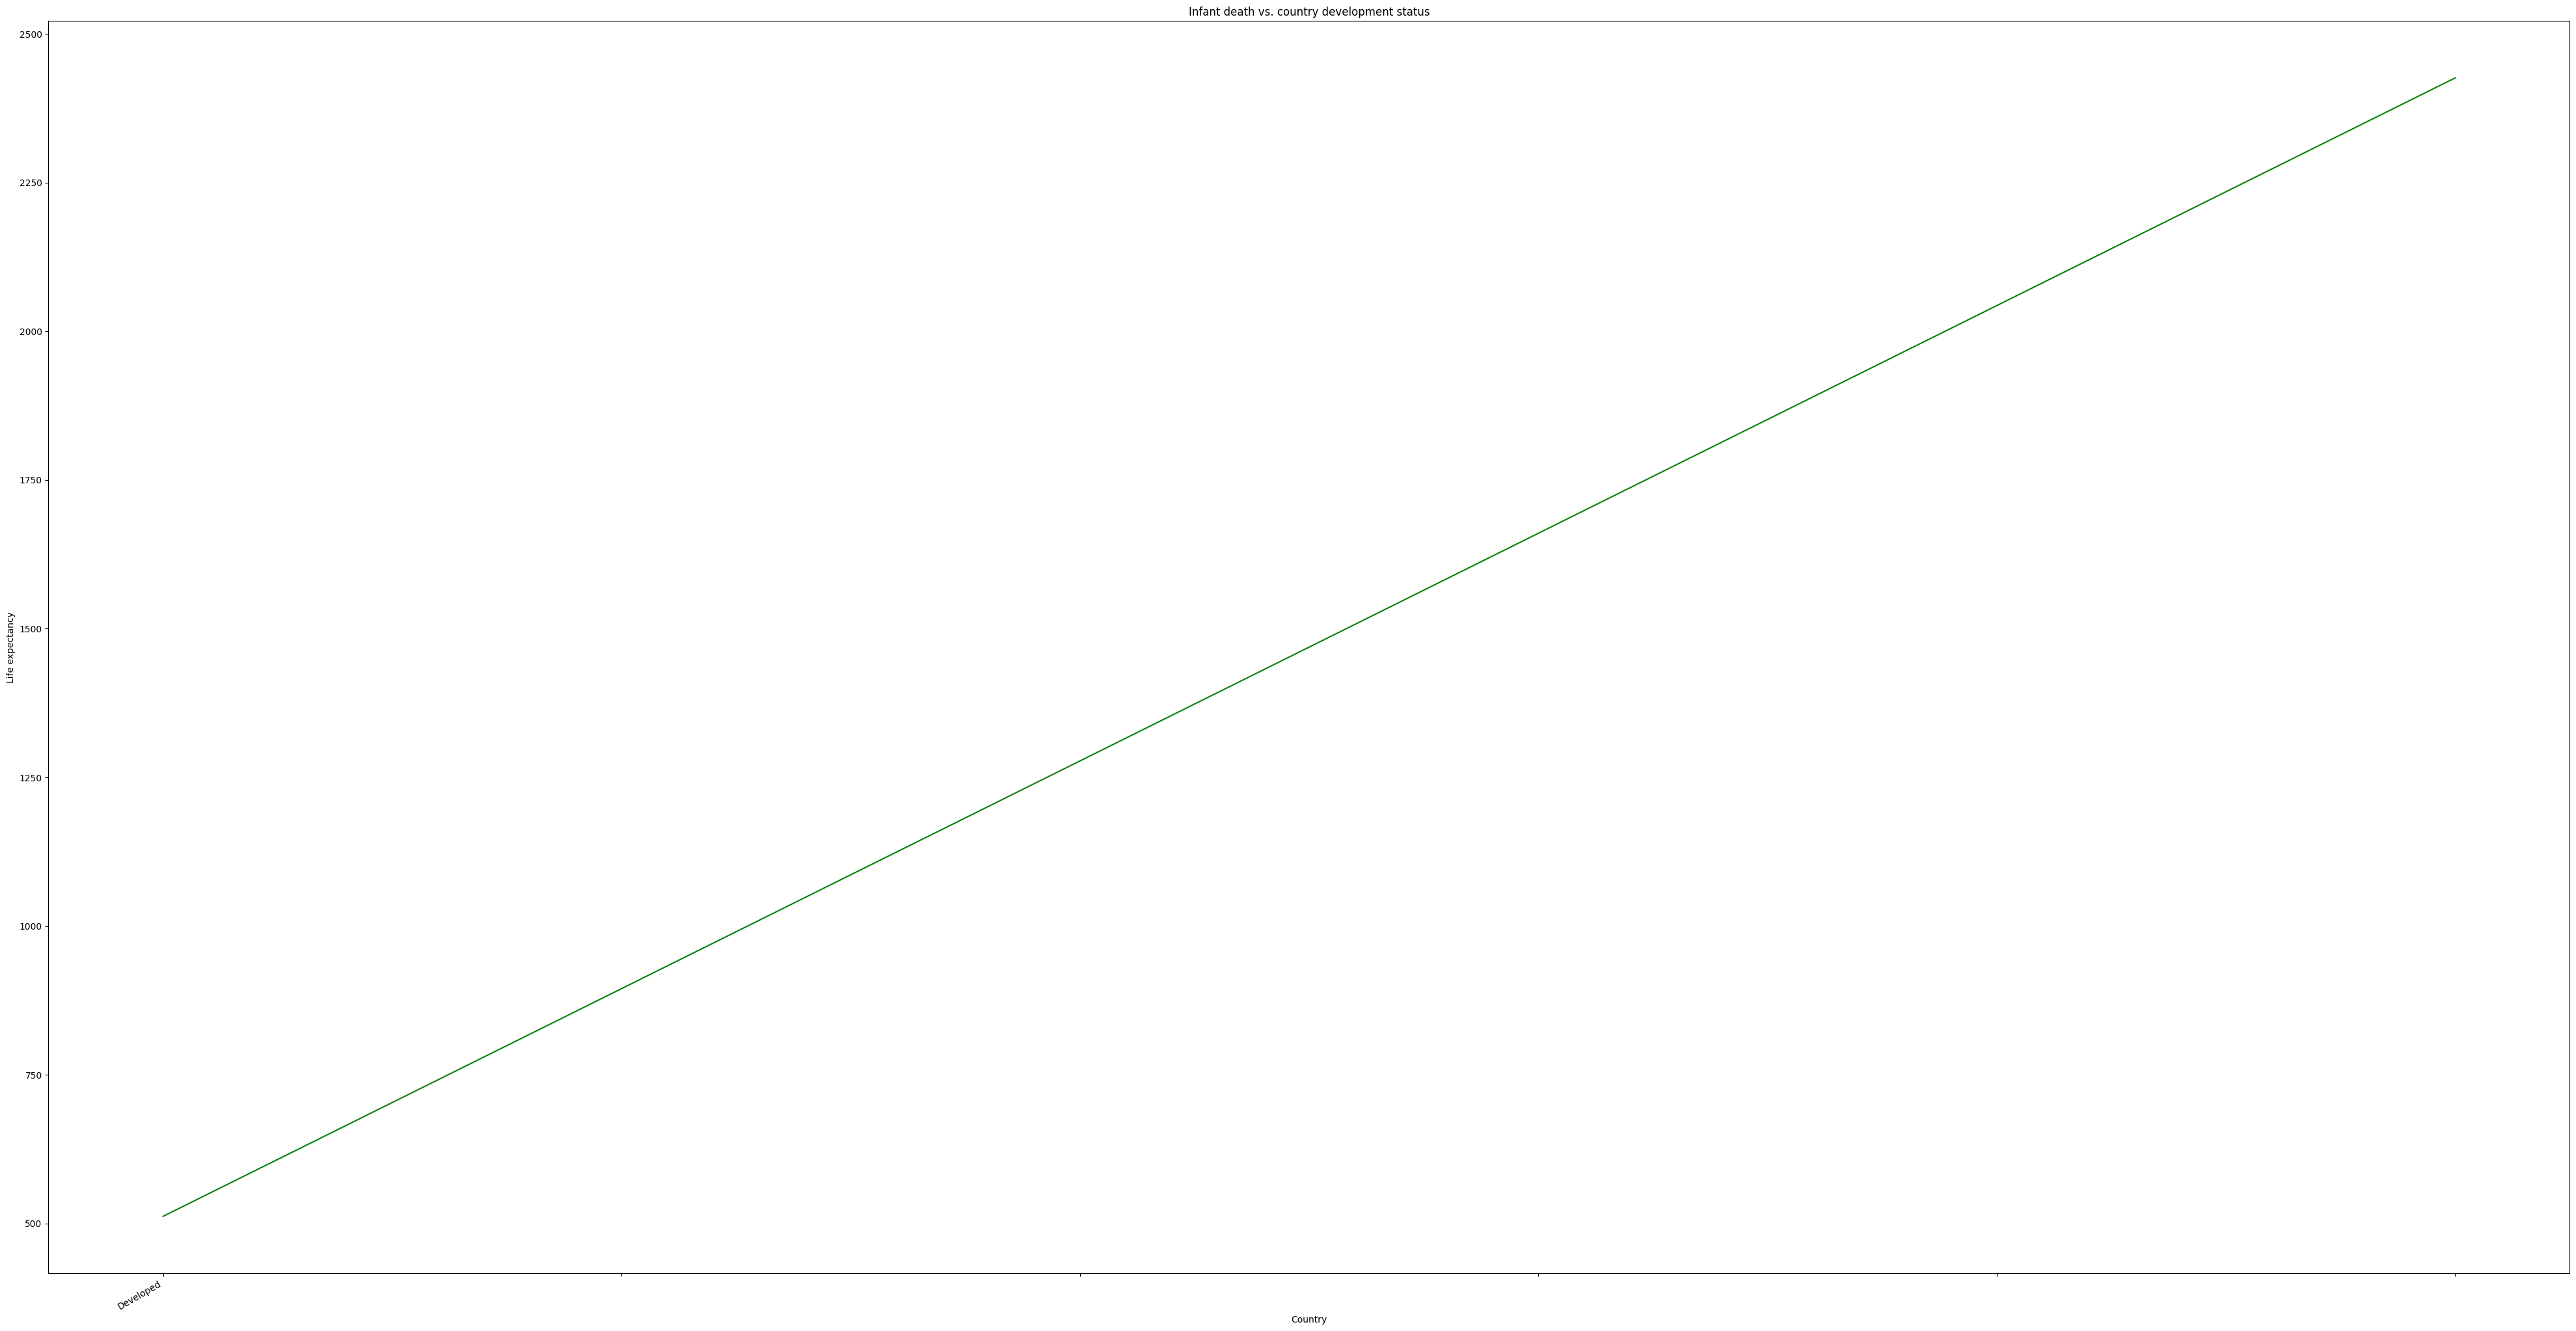

In [660]:
status_type.plot(x='status_type',xlabel='Country',y='Life expectancy ',ylabel='Life expectancy',c = 'green',title="Infant death vs. country development status",figsize=(50,25))
plt.xticks(rotation=30, ha='right')

Box plot

<Axes: >

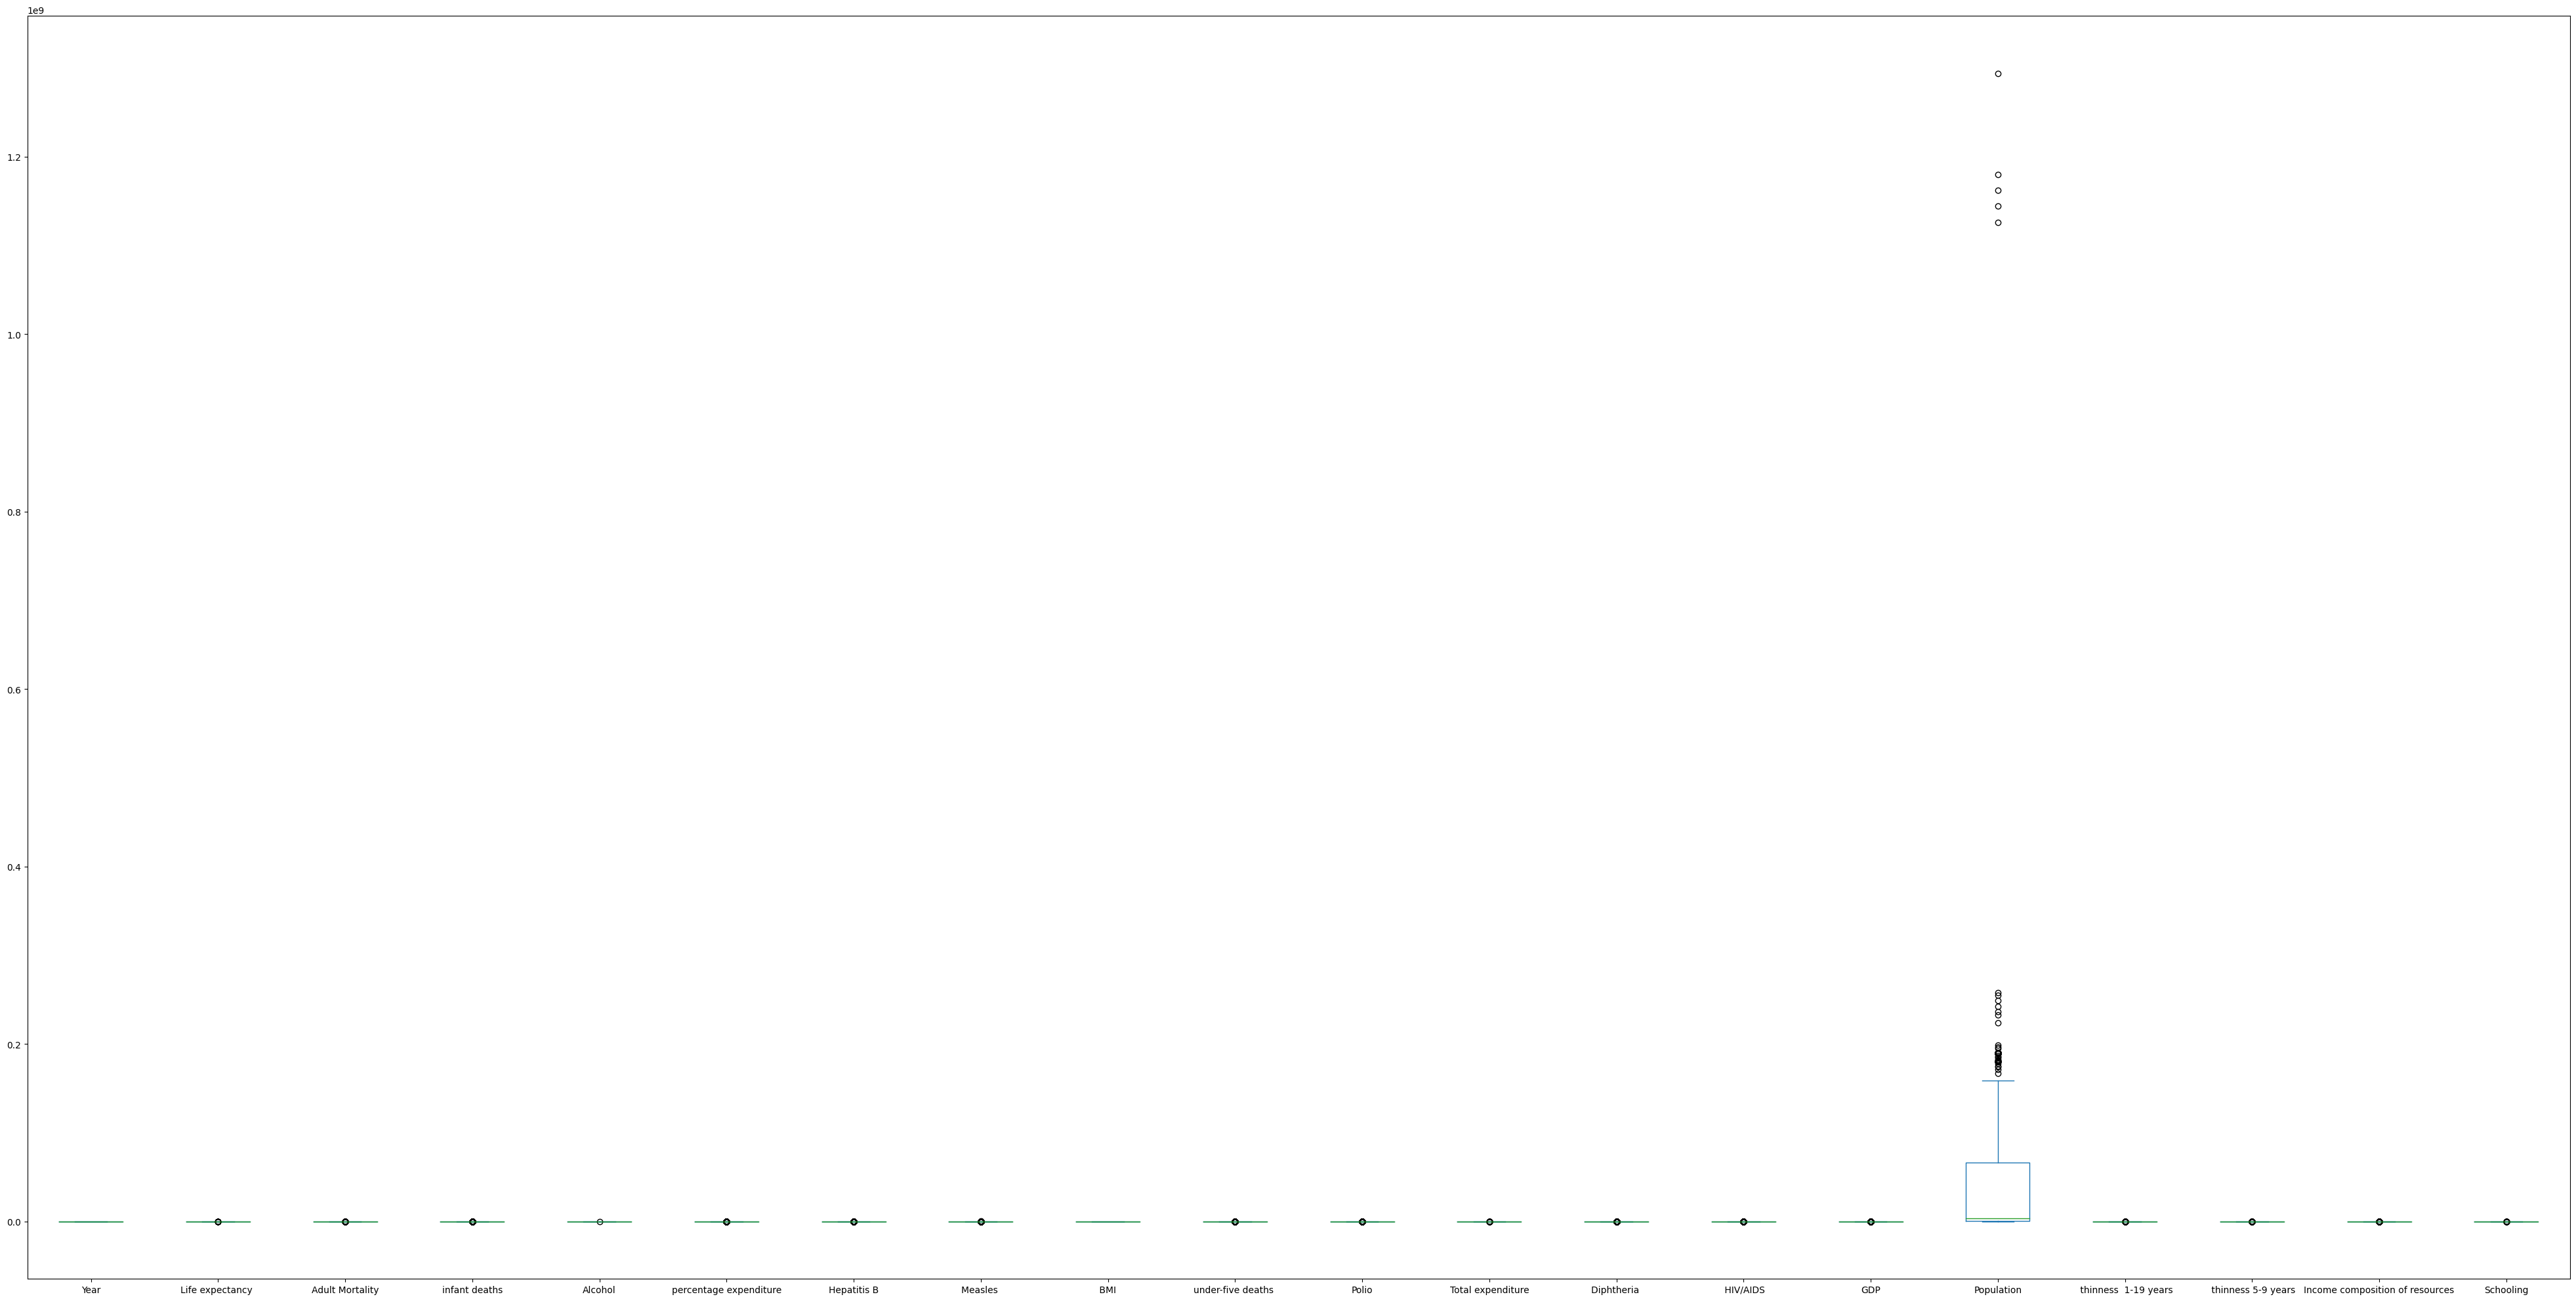

In [661]:
df.plot(kind='box',figsize=(50,25))

Bar plot

(array([0, 1]), [Text(0, 0, 'Developed'), Text(1, 0, 'Developing')])

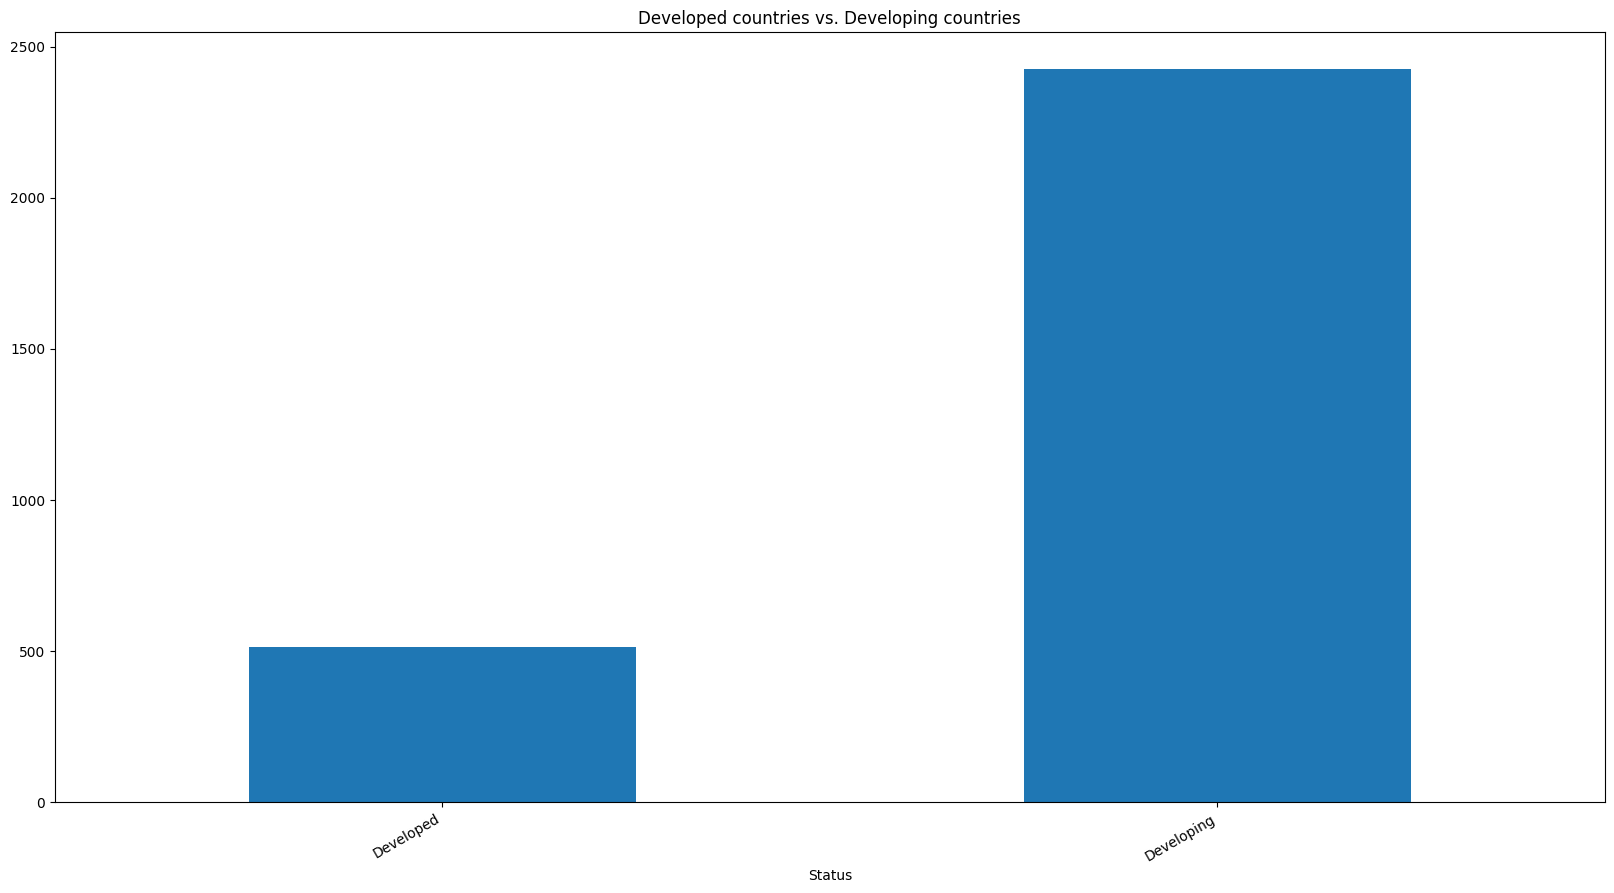

In [662]:
status_type.plot(kind='bar', figsize=(20,10), title='Developed countries vs. Developing countries')
plt.xticks(rotation=30, ha='right')

Heatmap

<Axes: >

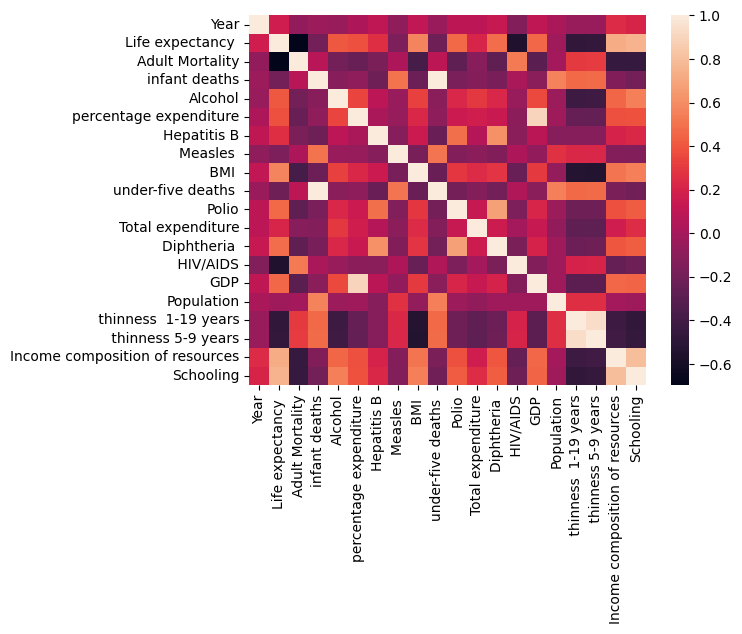

In [663]:
sns.heatmap(corr_data)

### Splitting Data into Train/Test

Creates a data frame called **X** of inputs that includes all columns except **date** and **life_expectancy** <br> Creates a data frame called **y** of input that only includes **life_expectancy** (target value)

In [664]:
from sklearn.model_selection import train_test_split

In [689]:
X = df.drop('Life expectancy ',axis=1)
y = df ['Life expectancy ']

Creates dummy variables to convert columns to numerical data

In [690]:
Country_dummy=pd.get_dummies(X['Country'])
status_dummy=pd.get_dummies(X['Status'])

Drops the **Country** and **Statu** column and concatenates them with the dummy variables

In [691]:
X.drop(['Country','Status'],inplace=True,axis=1)
X=pd.concat([X,Country_dummy,status_dummy],axis=1)

Splits the data into Train/Test sets and uses 20% of the data for testing. 4 data frames are created: **X_train**,**X_test**,**y_train**,**y_test** 

In [692]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Linear Regression

In [693]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [695]:
print(lr_model.coef_, lr_model.intercept_)

[ 2.53991827e-01 -2.10630466e-03  7.81840318e-02 -1.03684684e-01
  1.14846323e-04  3.44059856e-03 -8.14915201e-06 -1.06699584e-03
 -5.80634719e-02  4.18093803e-03 -3.43949143e-02  1.38410550e-03
 -3.10295236e-01 -1.57714052e-05  3.41554340e-10  1.35457027e-02
  1.57487000e-02 -1.86978428e-01  1.88257364e-01 -9.15190014e+00
  6.93552673e+00  4.71331318e+00 -1.57128488e+01  7.93935962e+00
  6.57768567e+00  5.22982679e+00  2.19600100e+00  2.91996607e+00
  2.70311301e+00  6.70209348e+00  6.75640596e+00  8.54444712e-02
  6.22647819e+00  2.43489035e+00  1.66727454e+00  1.35699438e+00
 -9.17722148e+00 -2.26337705e+00 -1.02450550e+00  7.88594582e+00
 -6.17289832e+00  4.43992656e+00  7.37916423e+00 -5.67496053e+00
 -9.23125752e+00 -1.02674719e+01  3.80453054e+00 -3.56314162e+00
 -1.03732518e+01  1.32523780e+01 -1.53005037e+01 -1.40085941e+01
  1.10914022e+01  3.82421263e+00  5.19574193e+00 -6.73303726e+00
 -5.84385373e+00 -4.39605181e-01  1.03376514e+01 -2.37539131e+00
  9.01783532e+00  1.07912

In [696]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [697]:
y_test_pred

array([78.07452501, 66.10582081, 57.56822714, 60.73889083, 58.83504501,
       70.20088379, 71.78274571, 83.19091567, 74.41754984, 52.25854724,
       65.01759787, 81.96987611, 75.37867048, 75.37296183, 65.38679277,
       75.22459383, 56.83261068, 62.90289827, 72.43706482, 82.15104194,
       74.19647204, 66.11734977, 73.39094125, 80.88215574, 71.31815163,
       62.79299936, 82.74474018, 69.08451567, 72.52782448, 73.67422735,
       77.03891648, 49.45314287, 78.87140171, 75.38599974, 75.98746382,
       72.24928722, 72.25716141, 82.15746678, 59.17547147, 72.57695545,
       59.41658009, 76.35690544, 81.89904422, 72.06220174, 74.13611319,
       78.88972005, 54.18097236, 74.0115078 , 53.69389398, 83.41477613,
       73.87788761, 57.73378741, 74.2457601 , 72.57187305, 71.2219603 ,
       71.86863851, 81.10442345, 75.18903403, 56.71898655, 72.82055697,
       70.08599978, 72.67010521, 80.98037247, 66.53477681, 61.53751574,
       74.32977648, 70.1453634 , 72.44433481, 46.40374086, 73.89

RSME shows that test and train models are very different

In [698]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_test_pred)**(0.5))

1.7635746176386082
2.016702587784421


Prints R2 score

In [699]:
r2_score(y_test, y_test_pred)

0.9553270545838993

In [700]:
lr_model.score(X_test,y_test)

0.9553270545838993

### Building the Pipeline

In [717]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [718]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [719]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

df.head()

In [720]:
num_attribs = ['Adult Mortality','GDP','Population']

Creates a pipeline that will transform the data and then run a Linear Regression.

In [721]:
col_transform = ColumnTransformer(transformers=[
                               ('num',OneHotEncoder(), num_attribs)],
                               remainder='passthrough'
              
                  )

In [722]:
pipeline = Pipeline([
                      ('transform',col_transform),
                      ('mlr_model',LinearRegression())
])

In [724]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', OneHotEncoder(),
                                                  ['Adult Mortality', 'GDP',
                                                   'Population'])])),
                ('mlr_model', LinearRegression())])

### Executing the Model

Runs the pipeline to fit the Linear Regression Model

In [726]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', OneHotEncoder(),
                                                  ['Adult Mortality', 'GDP',
                                                   'Population'])])),
                ('mlr_model', LinearRegression())])

### Evaluating Model

In [727]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Run the pipeline to predict y values from the test data set and save them in a variable called **y_pred**

In [728]:
y_pred = pipeline.predict(X_test)

ValueError: ignored

Calcuate the root mean squared error for both train and test.

In [729]:
r2_score(y_pred, y_test)

0.7791292278754534

Displays the intercept value (bias) and coefficients of the model.

In [730]:
pipeline.named_steps['mlr_model'].intercept_

-9.645877219543877

In [731]:
pipeline.named_steps['mlr_model'].coef_

array([ 0.68640296, -0.72718732, -1.51838052, ...,  0.23022683,
        1.21143765, -1.21143765])

In [732]:
print("Precision: ", precision_score(y_test,y_pred))  
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

ValueError: ignored

### Conclusion

As the test/train sets were unable to run due to an error, it is not possible to discern the efficacy of the Linear Regression model on this dataset. <br> However, when viewing other users' work with this dataset, it was observed that LR *is* an effective model with true predictions at approximately >95%

### SVM

Acquires data

In [735]:
df = pd.read_csv('/content/gdrive/MyDrive/Bellarmine/CS430_Data_Files/Life Expectancy Data.csv')

Splitting Data into Train/Test

In [736]:
X = np.array(df[[
     'Year'
    , 'Adult Mortality'
    , 'infant deaths'
    , 'Alcohol'
    , 'percentage expenditure'
    , 'Hepatitis B'
    , 'Measles '
    , ' BMI '
    , 'under-five deaths '
    , 'Polio'
    , 'Total expenditure'
    , 'Diphtheria '
    , ' HIV/AIDS'
    , 'GDP'
    , 'Population'
    , ' thinness  1-19 years'
    , ' thinness 5-9 years'
    , 'Income composition of resources'
    , 'Schooling']])
y = np.array(df[['Life expectancy ']])

Splits the data into Train/Test sets. Uses 20% of the data for testing.
<br>
 4 data frames: **X_train**, **X_test**, **y_train**, **y_test**

In [737]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

Building the Pipeline

In [740]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [741]:
df.columns.tolist()

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [743]:
num_attribs = ['infant deaths','Measles ','under-five deaths']
cat_attribs = ['Status','Country']

In [738]:
num_attribs = [[
     'Adult Mortality'
    , 'infant deaths'
    , 'Alcohol'
    , 'percentage expenditure'
    , 'Hepatitis B'
    , 'Measles '
    , ' BMI '
    , 'under-five deaths '
    , 'Polio'
    , 'Total expenditure'
    , 'Diphtheria '
    , ' HIV/AIDS'
    , 'GDP'
    , 'Population'
    , ' thinness  1-19 years'
    , ' thinness 5-9 years'
    , 'Income composition of resources'
    , 'Schooling'
]]
cat_attribs = ['Status','Country']

In [748]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(),num_attribs),
                               ('cat', OneHotEncoder(), cat_attribs)],
                               remainder='passthrough'
                  )

Creates a pipeline that will transform the data and then run an SVM

In [749]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('SVR', SVR(kernel="linear", C=75, max_iter=100000, epsilon=0.0)),
                     ])

In [747]:
pipeline

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['infant deaths', 'Measles ',
                                                   'under-five deaths']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Status', 'Country'])])),
                ('SVR',
                 SVR(C=75, epsilon=0.0, kernel='linear', max_iter=100000))])

In [750]:
pipeline.fit(X_train,np.ravel(y_train))

ValueError: ignored

Runs the pipeline to predict y values from the test data and saves them into a variable called **y_pred**

In [751]:
y_pred = pipeline.predict(X_test)

AttributeError: ignored

In [752]:
print(mean_squared_error(y_test, y_pred)**(0.5))
print(mean_absolute_error(y_test, y_pred))

ValueError: ignored

In [753]:
lr_pipeline = Pipeline([
                     ('trans', col_transform),
                     ('lr', LinearRegression()),
                     ])

In [754]:
lr_pipeline.fit(X_train,y_train)
y_pred_lr = lr_pipeline.predict(X_test)

ValueError: ignored

In [755]:
print(mean_squared_error(y_test, y_pred_lr)**(0.5))
print(mean_absolute_error(y_test, y_pred_lr))

NameError: ignored

### Conclusion
As the test/train sets were unable to run due to an error, it is not possible to discern the efficacy of the SVM model on this dataset.